In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from preprocessing import preprocess_hf_for_lasso
from sklearn.model_selection import train_test_split




heart_failure = pd.read_csv("heart_failure/train_val_split.csv")
y_train = heart_failure.pop("HeartDisease")
x_train = preprocess_hf_for_lasso(heart_failure)


#test set
heart_failure_test = pd.read_csv("heart_failure/test_split.csv")
y_test = heart_failure_test.pop("HeartDisease")
x_test = preprocess_hf_for_lasso(heart_failure_test)


#Get fetures 
# Get the columns with non-numeric output
non_numeric_columns = heart_failure.select_dtypes(exclude=np.number).columns
# Create dummy variables for non-numeric columns
heart_failure_dummies = pd.get_dummies(heart_failure, columns=non_numeric_columns)
features = heart_failure_dummies.columns

(734, 20)
(734,)
(184, 20)
(184,)


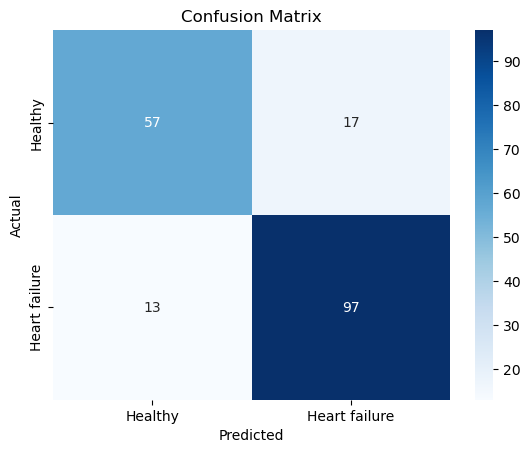

Balanced Accuracy: 0.826044226044226
Accuracy: 0.8369565217391305
F1 Score: 0.8660714285714286


In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, balanced_accuracy_score,f1_score
import seaborn as sns


clf = MLPClassifier(max_iter=1000,validation_fraction=0.2,early_stopping=True).fit(x_train, y_train)



y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)


# Define the labels for the confusion matrix
labels = ['Healthy', 'Heart failure']

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set the title and labels of the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()



#clf.score(x_train, y_train)
accuracy =clf.score(x_test, y_test)
f1 = f1_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

print("Balanced Accuracy:", balanced_accuracy)
print("Accuracy:", accuracy)
print("F1 Score:", f1)







SHAP Summery on traning data

Using 734 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/734 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


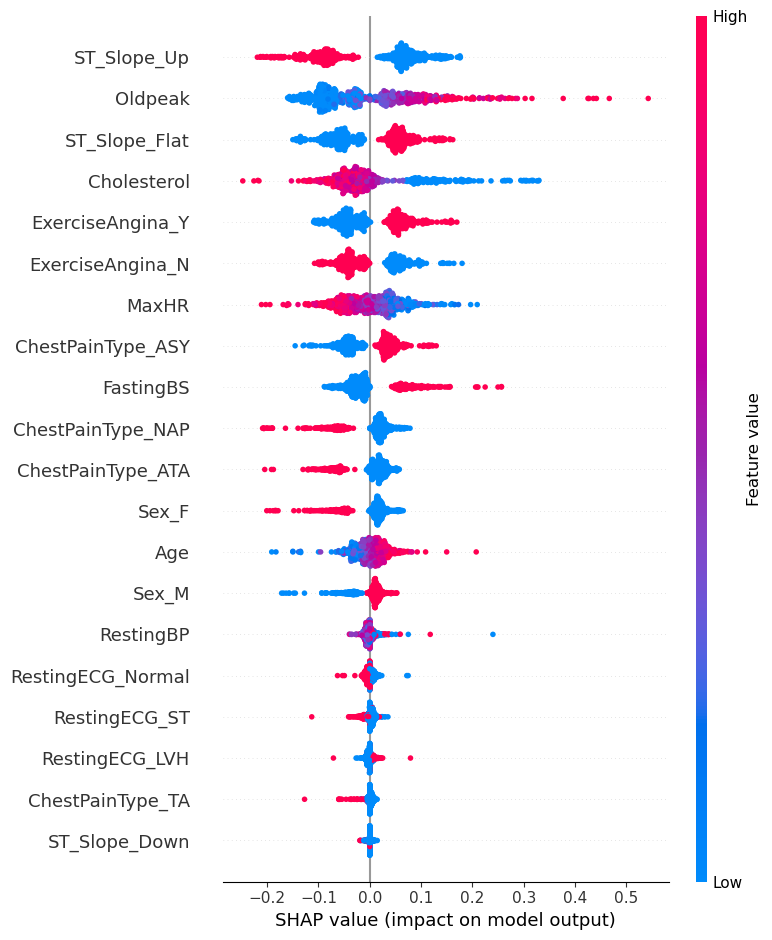

In [4]:
import shap

explainer = shap.KernelExplainer(clf.predict,x_train)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values,x_train,feature_names=features)

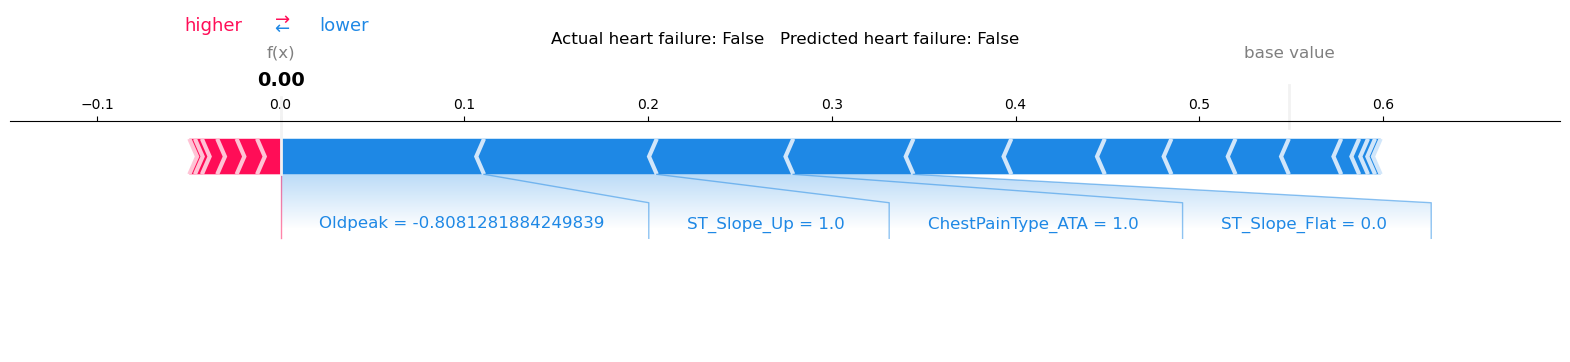

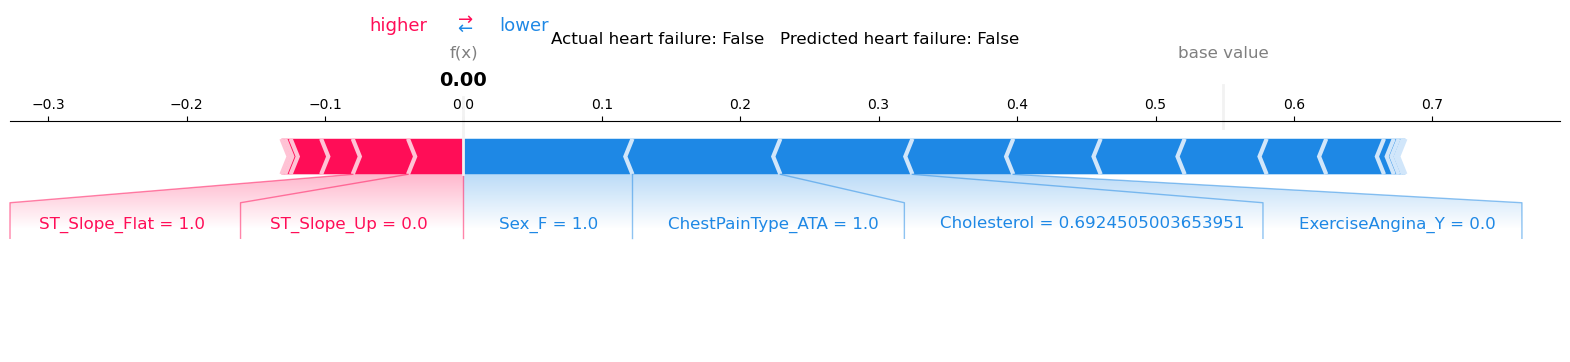

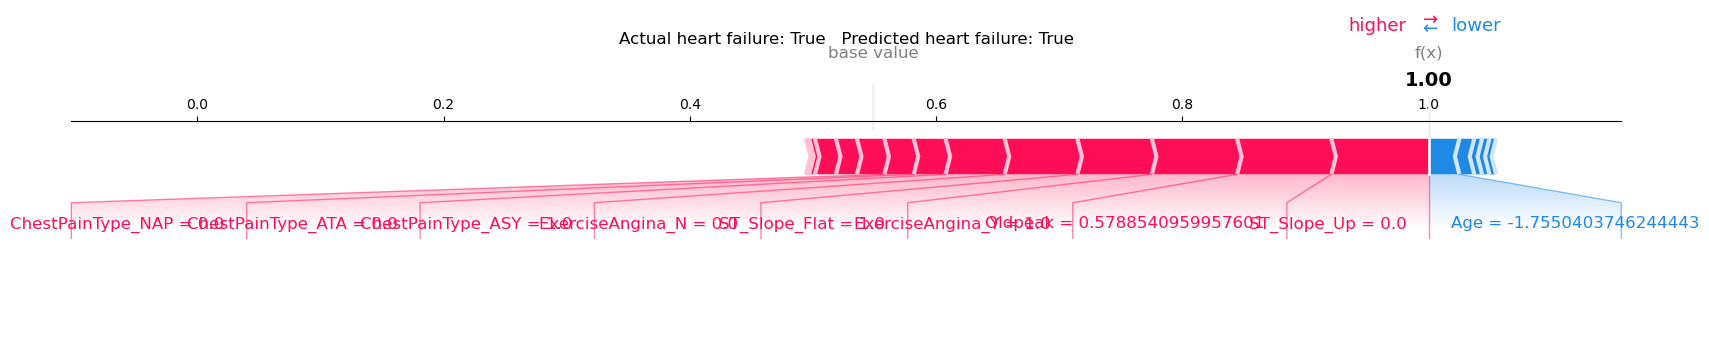

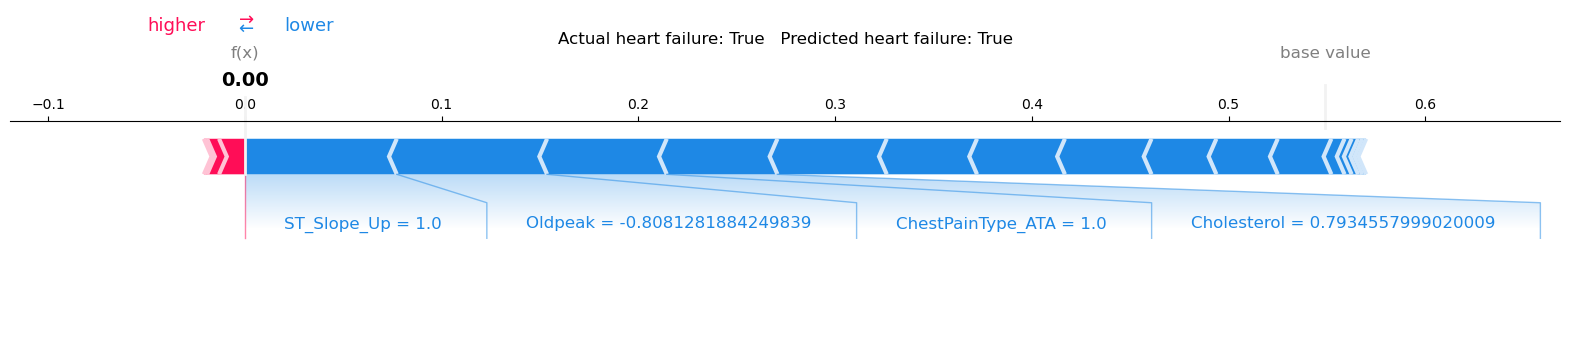

In [12]:
shap.initjs()
ii=[6,13,7,8]
def createStringTrueFalse(y):
# Create the text string based on the value of y_train
    if y == 0:
        return "False"
    elif y == 1:
        return "True"


for i in ii:
    shap.force_plot(explainer.expected_value, shap_values[i], x_train[i],feature_names=features ,matplotlib=True, show=False)
    plt.title("Actual heart failure: "+ createStringTrueFalse(y_test[i])+ "   Predicted heart failure: "+ createStringTrueFalse(y_pred[i]),y=1.3)
    plt.show()


# Show the plot
plt.show()
